In [222]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
def draw_bar_chart(title, bars, xticks, barWidth=0.25, ):
    plt.title(title)
    plt.ylabel('corners', fontweight='bold')

    # set height of bar
    bars1 = bars['harris']
    bars2 = bars['kanade']
    bars3 = bars['nobel']

    # Set position of bar on X axis
    r1 = np.arange(len(bars1)) - barWidth
    r2 = np.arange(len(bars2))
    r3 = np.arange(len(bars3)) + barWidth
    print(len(bars1))

    # Make the plot
    plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='harris', align='edge')
    plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='kanade', align='edge')
    plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='nobel', align='edge')

    # Add xticks on the middle of the group bars
    plt.xlabel('filters', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bars1))], xticks, rotation=45)

    # Create legend & Show graphic
    plt.legend()
    plt.show()

In [224]:
def get_file_maps_for_filters():
    files = {}
    folders = glob.glob(os.path.join("report", "results", "*"))
    for folder in folders:
        fltr = folder.split(os.path.sep)[-1]
        sub_folders = glob.glob(os.path.join(folder, "*"))
        for sub_folder in sub_folders:
            flname = sub_folder.split(os.path.sep)[-1]
            if not os.path.isfile(sub_folder):
                if flname not in files:
                    files[flname] = {}
                if fltr not in files[flname]:
                    files[flname][fltr] = []
                files[flname][fltr] += glob.glob(os.path.join(sub_folder, "*.csv"))
    return files

In [225]:
files = get_file_maps_for_filters()

7


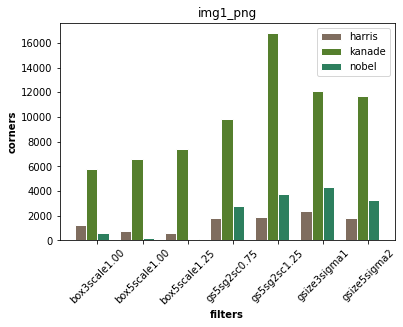

7


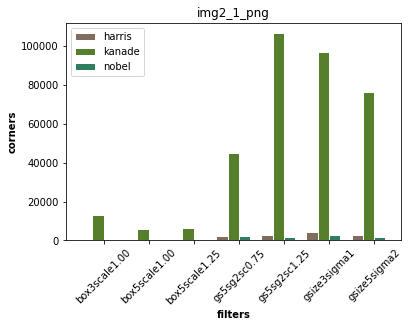

7


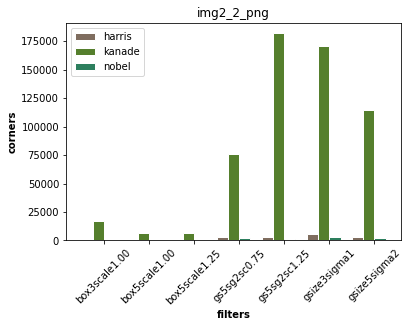

7


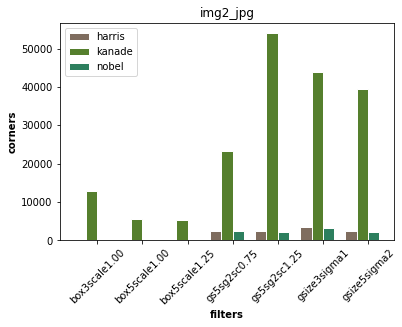

7


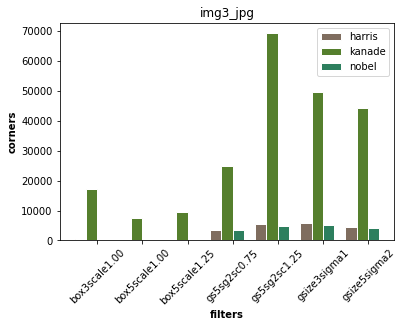

7


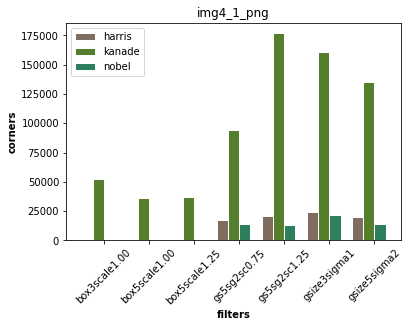

7


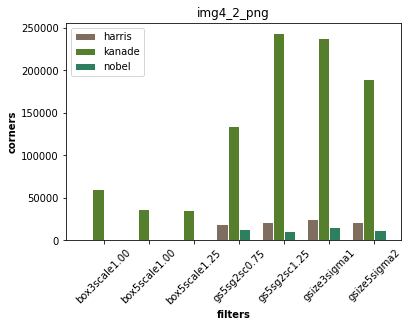

7


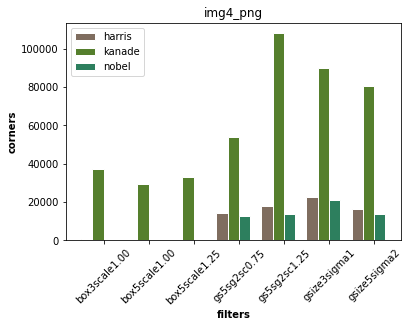

<Figure size 432x288 with 0 Axes>

In [226]:
for flname, filters in files.items():
    bars = {}
    xticks = []
    for fltr, csv_files in filters.items():
        xticks.append(fltr)
        for csv_file in csv_files:
            filename = csv_file.split(os.path.sep)[-1].replace('_corners.csv', '')
            df = pd.read_csv(csv_file)
            if filename not in bars:
                bars[filename] = []
            bars[filename].append(len(df.index))
    draw_bar_chart(flname, bars, xticks, 0.25)